In [1]:
import os
import pandas as pd
import sys

%load_ext autoreload
%autoreload 2

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..")))

from datatools.Bepro_preprocessor import OlderPreprocesssor, NewPreprocessor

# Define the path to the dataset
base_path = os.path.join(os.path.dirname(os.getcwd()))
base_path

'/root/geonhee/express/PlayerImputer'

구버전 Bepro 데이터

In [23]:
match_path = os.path.join(base_path, "data", "BEPRO", "2023")
game_ids = sorted([f for f in os.listdir(match_path)])
game_id = game_ids[25]

print(f"game_id: {game_id}")
events = pd.read_csv(os.path.join(match_path, game_id, "events.csv"))
positions = pd.read_csv(os.path.join(match_path, game_id, 'positions.csv'), 
        dtype={
        "player_code": "str",        # 또는 "str"
        "event_types": "str"
    })
# teams
processor = OlderPreprocesssor(events, positions, game_id)
tracking_data = processor.build_tracking_data()
team_sheets = processor.build_teams()

# events
events = processor.build_events(exclude_list=["NotaPlay"])
team_sheets.shape

game_id: 85796


(32, 6)

In [24]:
tracking_data

,frame,period_id,time,phase,episode,player_code,event_types,A00_x,A00_y,A00_vx,...,H14_vx,H14_vy,H14_speed,H14_accel,H15_x,H15_y,H15_vx,H15_vy,H15_speed,H15_accel
0,0,1,0.1,1,1,NaN,NaN,99.076895,35.683040,-0.457453,...,0.028106,0.082276,0.086944,0.360654,37.388965,52.128899,0.223270,0.781303,0.812578,-0.183913
1,1,1,0.2,1,1,NaN,NaN,99.118778,35.719519,-0.400815,...,-0.031275,0.118031,0.122104,0.582491,37.379348,52.050219,0.283301,0.756308,0.807627,0.072152
2,2,1,0.3,1,1,NaN,NaN,99.153026,35.753131,-0.339418,...,-0.095647,0.156790,0.183662,0.756885,37.352534,51.978495,0.367452,0.721270,0.809476,0.325056
3,3,1,0.4,1,1,NaN,NaN,99.179640,35.783874,-0.273261,...,-0.165009,0.198555,0.258170,0.883833,37.308524,51.913726,0.475722,0.676190,0.826767,0.574799
4,4,1,0.5,1,1,NaN,NaN,99.198618,35.811750,-0.202344,...,-0.239360,0.243324,0.341320,0.963337,37.247318,51.855913,0.608112,0.621067,0.869209,0.821380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58343,58343,2,2954.5,8,0,NaN,NaN,99.882761,32.456695,-0.267404,...,-1.508064,-2.454696,2.880936,2.131657,NaN,NaN,NaN,NaN,NaN,NaN
58344,58344,2,2954.6,8,0,NaN,NaN,99.855322,32.433871,-0.282230,...,-1.697341,-2.557176,3.069221,1.992326,NaN,NaN,NaN,NaN,NaN,NaN
58345,58345,2,2954.7,8,0,NaN,NaN,99.826442,32.412984,-0.297056,...,-1.886618,-2.659656,3.260843,1.689086,NaN,NaN,NaN,NaN,NaN,NaN
58346,58346,2,2954.8,8,0,NaN,NaN,99.796119,32.394033,-0.311881,...,-2.075896,-2.762136,3.455248,1.221935,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
events

,game_id,type_name,time_seconds,period_id,team,player_id,outcome,qualifier,start_x,start_y,related_id,related_x,related_y,team_id,event_id
0,85796,Pass,0.8,1,Home,H12,1.0,[passSucceeded],52.872496,34.304028,H20,27.578552,34.057052,H85796,0
1,85796,Receive,2.7,1,Home,H10,1.0,[passReceived],27.578552,34.057052,NaN,NaN,NaN,H85796,1
2,85796,Pass,5.6,1,Home,H10,1.0,[passSucceeded],28.167088,32.984080,H98,29.707848,53.045236,H85796,2
3,85796,Receive,6.8,1,Home,H15,1.0,[passReceived],29.707848,53.045236,NaN,NaN,NaN,H85796,3
4,85796,Pass,7.7,1,Home,H15,1.0,[passSucceeded],27.878592,52.928684,NaN,NaN,NaN,H85796,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,85796,Pass,2941.8,2,Home,H14,1.0,[passSucceeded],99.624512,67.307801,NaN,NaN,NaN,H85796,1872
1873,85796,Pass,2943.4,2,Home,H10,1.0,"[passSucceeded, passReceived]",83.117840,54.195864,H22,79.956864,62.891568,H85796,1873
1874,85796,Receive,2944.4,2,Home,H11,1.0,[passReceived],79.956864,62.891568,NaN,NaN,NaN,H85796,1874
1875,85796,Take-On,2946.5,2,Home,H11,1.0,[dribbleSucceeded],86.184384,64.567095,NaN,NaN,NaN,H85796,1875


In [26]:
team_sheets

,player_id,xID,team,game_id,player,team_id
0,A00,0,Away,85796,A00,A85796
1,A01,1,Away,85796,A01,A85796
2,A02,2,Away,85796,A02,A85796
3,A03,3,Away,85796,A03,A85796
4,A04,4,Away,85796,A04,A85796
5,A05,5,Away,85796,A05,A85796
6,A06,6,Away,85796,A06,A85796
7,A07,7,Away,85796,A07,A85796
8,A08,8,Away,85796,A08,A85796
9,A09,9,Away,85796,A09,A85796


In [11]:
print(tracking_data.dtypes[["player_code", "event_types"]])
print(tracking_data[["player_code", "event_types"]].dropna().sample(10))

player_code    object
event_types    object
dtype: object
      player_code                 event_types
12155         H03               passSucceeded
56961         A06       intercept turnoverWon
29905         H30               passSucceeded
38218         H02  passSucceeded passReceived
14187         H06  passSucceeded passReceived
12124         H30                passReceived
10327         H03                passReceived
2968          A66  passSucceeded passReceived
56978         A06               passSucceeded
14687         A26               passSucceeded


In [9]:
tracking_data

,frame,session,time,phase,episode,player_code,event_types,ball_x,ball_y,ball_vx,...,H88_vx,H88_vy,H88_speed,H88_accel,H96_x,H96_y,H96_vx,H96_vy,H96_speed,H96_accel
0,0,1,0.1,1,0,NaN,NaN,51.304093,34.231683,0.0,...,-0.334972,0.672069,0.750921,-0.238583,33.448151,39.797794,0.118232,-0.660445,0.670944,-0.475318
1,1,1,0.2,1,0,NaN,NaN,51.304093,34.231683,0.0,...,-0.296681,0.658533,0.722277,-0.307991,33.460743,39.734433,0.134559,-0.603419,0.618240,-0.580834
2,2,1,0.3,1,0,NaN,NaN,51.304093,34.231683,0.0,...,-0.255171,0.643859,0.692580,-0.346196,33.475598,39.678979,0.152257,-0.541602,0.562596,-0.632818
3,3,1,0.4,1,0,NaN,NaN,51.304093,34.231683,0.0,...,-0.210444,0.628048,0.662368,-0.353199,33.492717,39.631432,0.171328,-0.474992,0.504946,-0.631271
4,4,1,0.5,1,0,NaN,NaN,51.304093,34.231683,0.0,...,-0.162499,0.611099,0.632336,-0.328998,33.512100,39.591792,0.191770,-0.403590,0.446834,-0.576191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57343,57343,2,2905.5,9,0,NaN,NaN,102.344109,29.265513,0.0,...,NaN,NaN,NaN,NaN,85.077988,15.212066,-0.710436,-0.984175,1.213804,0.689869
57344,57344,2,2905.6,9,0,NaN,NaN,102.344109,29.265513,0.0,...,NaN,NaN,NaN,NaN,85.008983,15.105928,-0.690052,-1.061378,1.265976,0.682842
57345,57345,2,2905.7,9,0,NaN,NaN,102.344109,29.265513,0.0,...,NaN,NaN,NaN,NaN,84.942016,14.992070,-0.669668,-1.138582,1.320918,0.578817
57346,57346,2,2905.8,9,0,NaN,NaN,102.344109,29.265513,0.0,...,NaN,NaN,NaN,NaN,84.877088,14.870491,-0.649284,-1.215785,1.378297,0.377795


In [52]:
processor.build_teams()

,player_id,xID,team,game_id,player,team_id
0,A01,1,Away,85785,A01,A85785
1,A03,3,Away,85785,A03,A85785
2,A05,5,Away,85785,A05,A85785
3,A06,6,Away,85785,A06,A85785
4,A09,9,Away,85785,A09,A85785
5,A11,11,Away,85785,A11,A85785
6,A13,13,Away,85785,A13,A85785
7,A14,14,Away,85785,A14,A85785
8,A16,16,Away,85785,A16,A85785
9,A22,22,Away,85785,A22,A85785


In [48]:
processor.build_tracking_data()

,frame,period_id,time,phase,episode,player_code,event_types,A01_x,A01_y,A01_vx,...,H33_vx,H33_vy,H33_speed,H33_accel,H97_x,H97_y,H97_vx,H97_vy,H97_speed,H97_accel
0,0,1,0.1,1,0,NaN,NaN,98.805420,25.158477,0.077394,...,0.069011,0.007593,0.069427,0.061368,48.169165,21.769952,0.507604,-0.106099,0.518574,-0.075943
1,1,1,0.2,1,0,NaN,NaN,98.812287,25.156942,0.067309,...,0.074620,0.006550,0.074907,0.060249,48.216703,21.760682,0.497675,-0.101477,0.507916,-0.121284
2,2,1,0.3,1,0,NaN,NaN,98.817831,25.158562,0.056377,...,0.080701,0.005420,0.080882,0.061014,48.262940,21.751984,0.486912,-0.096466,0.496376,-0.151811
3,3,1,0.4,1,0,NaN,NaN,98.822055,25.163340,0.044598,...,0.087253,0.004202,0.087354,0.063663,48.307876,21.743857,0.475314,-0.091067,0.483960,-0.167524
4,4,1,0.5,1,0,NaN,NaN,98.824956,25.171274,0.031970,...,0.094276,0.002896,0.094320,0.068197,48.351510,21.736303,0.462883,-0.085280,0.470673,-0.168423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58183,58183,2,2983.5,12,0,NaN,NaN,95.244379,35.386413,-0.402706,...,-0.047082,-1.019875,1.020961,0.429846,NaN,NaN,NaN,NaN,NaN,NaN
58184,58184,2,2983.6,12,0,NaN,NaN,95.287336,35.463813,-0.454475,...,-0.074516,-1.054663,1.057292,0.406058,NaN,NaN,NaN,NaN,NaN,NaN
58185,58185,2,2983.7,12,0,NaN,NaN,95.335187,35.541778,-0.506243,...,-0.101951,-1.089451,1.094211,0.342073,NaN,NaN,NaN,NaN,NaN,NaN
58186,58186,2,2983.8,12,0,NaN,NaN,95.387931,35.620311,-0.558012,...,-0.129385,-1.124239,1.131660,0.237893,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
team_sheets

,player_id,xID,team,game_id,player,team_id
0,A01,1,A,85785,A01,A85785
1,A03,3,A,85785,A03,A85785
2,A05,5,A,85785,A05,A85785
3,A06,6,A,85785,A06,A85785
4,A09,9,A,85785,A09,A85785
5,A11,11,A,85785,A11,A85785
6,A13,13,A,85785,A13,A85785
7,A14,14,A,85785,A14,A85785
8,A16,16,A,85785,A16,A85785
9,A22,22,A,85785,A22,A85785


In [27]:
events["player_id"].unique()

array(['A09', 'A14', 'A05', 'A01', 'H03', 'A16', 'A06', 'A03', 'H08',
       'A33', 'H28', 'H13', 'H26', 'H23', 'A22', 'H17', 'H33', 'H27',
       'H10', 'H97', 'A11', 'A44', 'A30', 'H19', 'A13', 'A24', 'A91',
       'H06', 'H09', 'H07'], dtype=object)

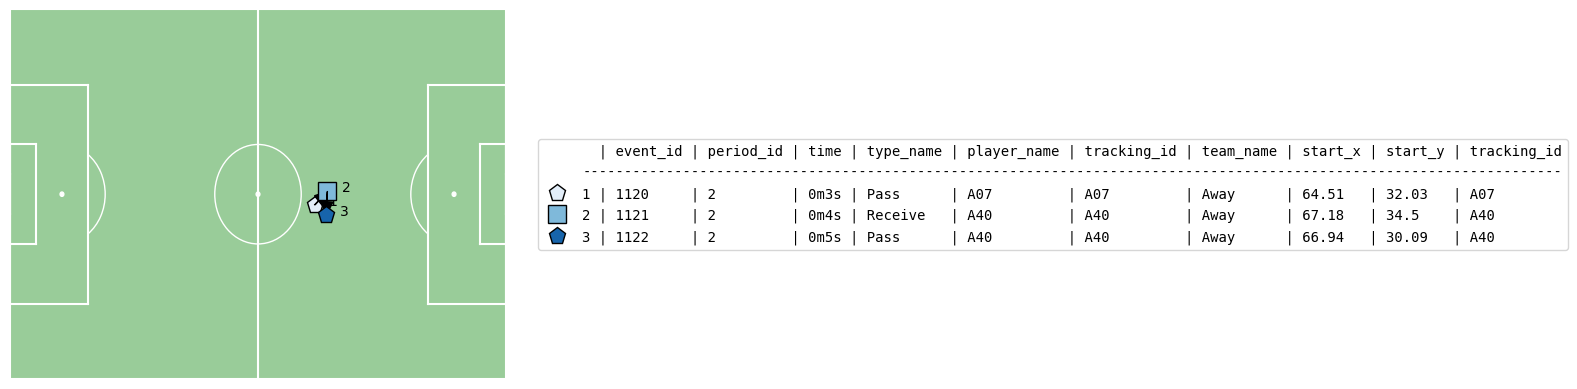

In [13]:
import datatools.matplotsoccer as mps

filtered_events = events[events["start_x"].notna() & events["start_y"].notna()]
# filtered_events = events[events["event_id"] >= 1299] # 389
idx = 1120
e = events[idx:idx+1].copy()
l = min(1, len(e))

for j in range(0, l):
    row = list(e[j:j+1].itertuples())[0]
    i = row.Index
    a = filtered_events.loc[i-0: i+2].copy()

    for col in ["start_x", "start_y"]:
        a[col] = a[col].apply(lambda x : round(x, 2))

    a["time"] = a["time_seconds"].apply(lambda t: f"{int(t // 60)}m{int(t % 60)}s")
    a["player_name"] = a["player_id"].apply(lambda x: team_sheets.loc[team_sheets["player_id"] == x, "player"].values[0])
    a["team_name"] = a["team_id"].apply(lambda x: team_sheets.loc[team_sheets["team_id"] == x, "team"].values[0])

    a["tracking_id"] = a["player_id"].apply(lambda x: team_sheets.loc[team_sheets["player_id"] == x, "xID"].values[0])
    a["tracking_id"] = a[["tracking_id", "team_name"]].apply(lambda x: f"{x[1][0]}{x[0]:02d}", axis=1)  
    
    cols = ["event_id", "period_id", "time", "type_name", "player_name", "tracking_id", "team_name", "start_x", "start_y", "tracking_id"]
    labeltitle = ["event_id", "period_id", "time", "type_name", "player_name", "tracking_id", "team_name", "start_x", "start_y", "tracking_id"]

    mps.actions(a[["start_x", "start_y"]],
                a.type_name,
                team=a.team_name,
                label=a[cols],
                color="green",
                labeltitle = labeltitle,
                zoom=False,
                show=False,
                show_legend= True)

In [14]:
a

,game_id,type_name,time_seconds,period_id,team,player_id,outcome,qualifier,start_x,start_y,related_id,related_x,related_y,team_id,event_id,time,player_name,team_name,tracking_id
1120,114467,Pass,3.5,2,Away,A07,1.0,"[passSucceeded, backwardPassSucceeded, shortPa...",64.51,32.03,A40,67.184,34.49844,A114467,1120,0m3s,A07,Away,A07
1121,114467,Receive,4.2,2,Away,A40,1.0,[passReceived],67.18,34.50,NaN,NaN,NaN,A114467,1121,0m4s,A40,Away,A40
1122,114467,Pass,5.3,2,Away,A40,1.0,"[passSucceeded, sidewaysPassSucceeded, shortPa...",66.94,30.09,NaN,NaN,NaN,A114467,1122,0m5s,A40,Away,A40


In [28]:
tracking_data = pd.read_csv(os.path.join(match_path, game_id, 'positions.csv'))
tracking_data = preprocess_tracking_data(tracking_data)
tracking_data

,frame,period_id,time,phase,episode,player_code,event_types,A01_x,A01_y,A01_vx,...,H33_vx,H33_vy,H33_speed,H33_accel,H97_x,H97_y,H97_vx,H97_vy,H97_speed,H97_accel
0,0,1,0.1,1,0,NaN,NaN,101.628432,26.638387,0.077394,...,0.069011,0.007593,0.069427,0.061368,49.545427,23.050537,0.507604,-0.106099,0.518574,-0.075943
1,1,1,0.2,1,0,NaN,NaN,101.635495,26.636762,0.067309,...,0.074620,0.006550,0.074907,0.060249,49.594323,23.040722,0.497675,-0.101477,0.507916,-0.121284
2,2,1,0.3,1,0,NaN,NaN,101.641198,26.638478,0.056377,...,0.080701,0.005420,0.080882,0.061014,49.641882,23.031512,0.486912,-0.096466,0.496376,-0.151811
3,3,1,0.4,1,0,NaN,NaN,101.645543,26.643536,0.044598,...,0.087253,0.004202,0.087354,0.063663,49.688101,23.022907,0.475314,-0.091067,0.483960,-0.167524
4,4,1,0.5,1,0,NaN,NaN,101.648526,26.651937,0.031970,...,0.094276,0.002896,0.094320,0.068197,49.732982,23.014909,0.462883,-0.085280,0.470673,-0.168423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58183,58183,2,2983.5,12,0,NaN,NaN,97.965647,37.467967,-0.402706,...,-0.047082,-1.019875,1.020961,0.429846,NaN,NaN,NaN,NaN,NaN,NaN
58184,58184,2,2983.6,12,0,NaN,NaN,98.009831,37.549919,-0.454475,...,-0.074516,-1.054663,1.057292,0.406058,NaN,NaN,NaN,NaN,NaN,NaN
58185,58185,2,2983.7,12,0,NaN,NaN,98.059050,37.632471,-0.506243,...,-0.101951,-1.089451,1.094211,0.342073,NaN,NaN,NaN,NaN,NaN,NaN
58186,58186,2,2983.8,12,0,NaN,NaN,98.113301,37.715623,-0.558012,...,-0.129385,-1.124239,1.131660,0.237893,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import numpy as np
import PlayerImputer.imputer.config as config
from datatools.trace_snapshot import TraceSnapshot
from datatools.utils import compute_camera_coverage, is_inside

In [32]:
cols[15:]

['A91_x',
 'H03_x',
 'H06_x',
 'H07_x',
 'H08_x',
 'H09_x',
 'H10_x',
 'H13_x',
 'H17_x',
 'H19_x',
 'H23_x',
 'H26_x',
 'H27_x',
 'H28_x',
 'H33_x',
 'H97_x']

player_id: A07 loc: (64.50943199999999, 32.028136) action: Pass time: 3.5
visible_area:  ((array([49.12437816]), array([76.55353974])), (array([97.85339561]), array([65.30562917])), (array([70.05588039]), array([13.02102085])), (array([51.19332798]), array([17.37498311])))
not exist ball trajectory


(<Figure size 2080x1440 with 1 Axes>, <Axes: >)

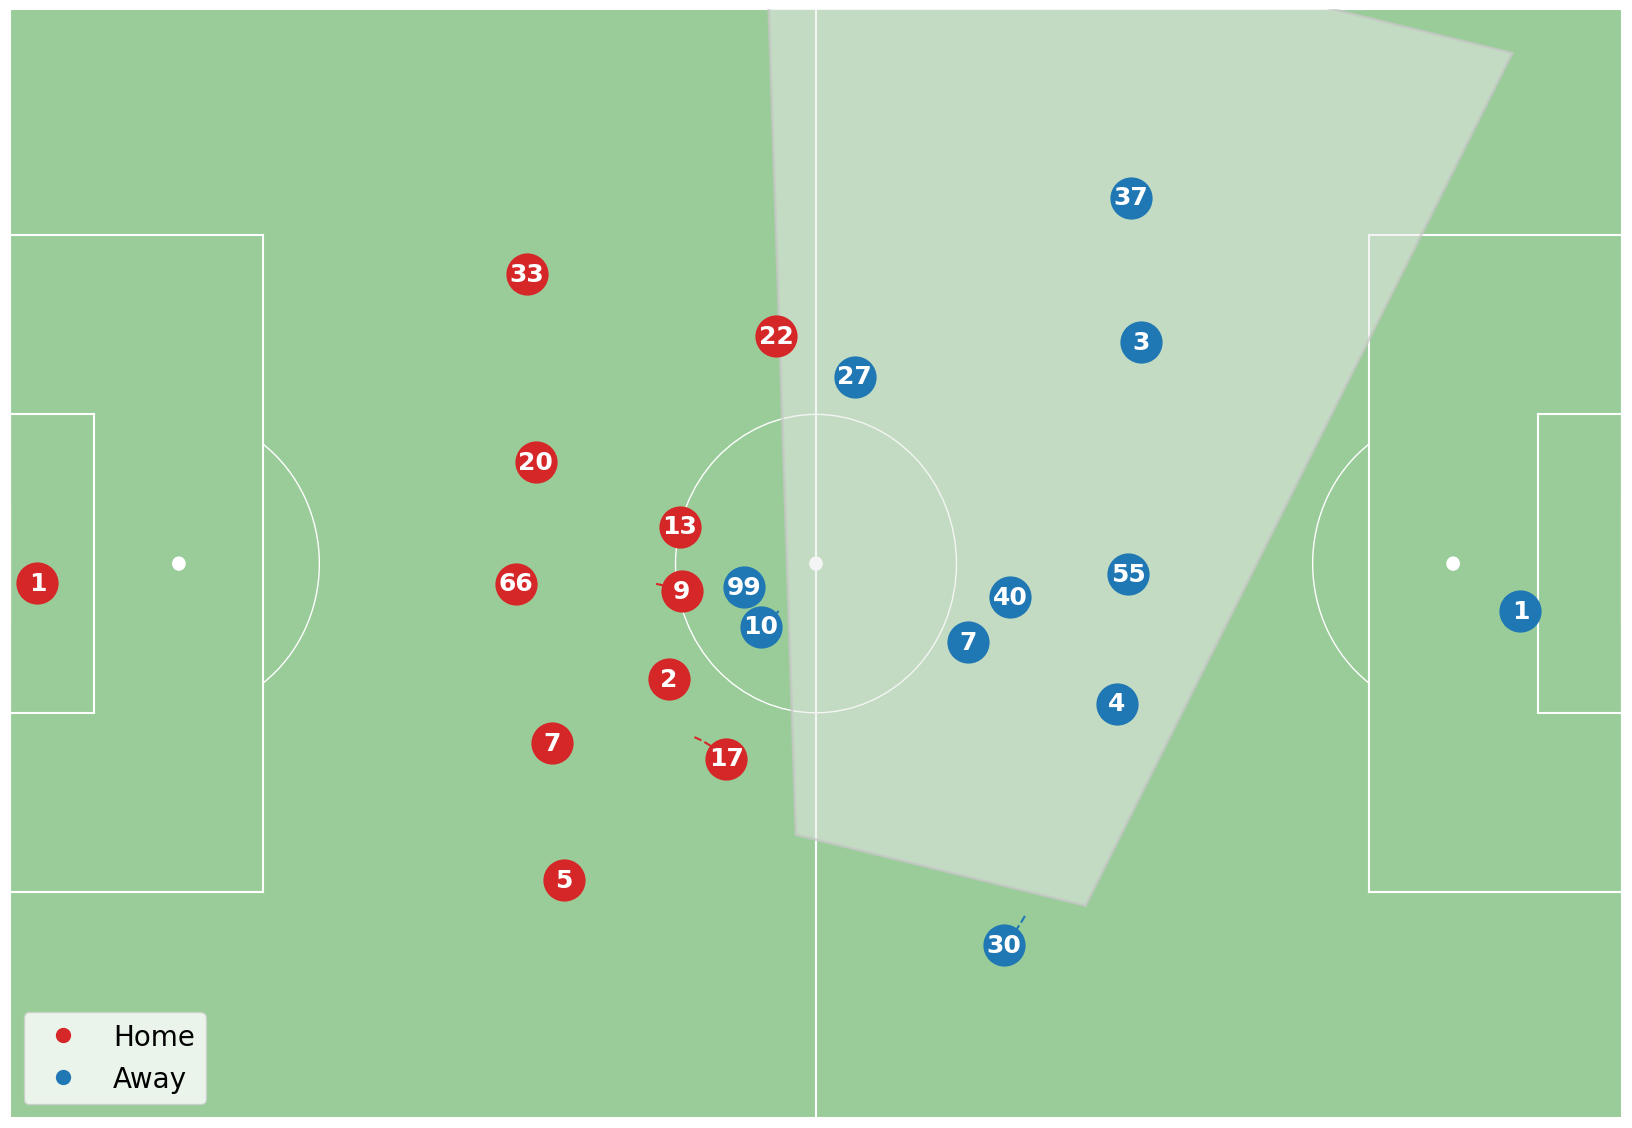

In [18]:
idx = a.iloc[0].event_id
before_maigin = 0.4
after_margin = 0.4

highlight = events[events["event_id"] == idx].iloc[0]
player = team_sheets[team_sheets["player_id"] == highlight.player_id].apply(lambda x: f"{x['team'][0]}{x['xID']:02d}", axis=1).values[0]
print("player_id:", player, "loc:", (highlight.start_x, highlight.start_y), "action:", highlight.type_name, "time:", highlight.time_seconds)

trace = tracking_data[
    (tracking_data["period_id"] == highlight.period_id) & 
    (tracking_data["time"] >= highlight.time_seconds-before_maigin) & 
    (tracking_data["time"] <= highlight.time_seconds+after_margin)]
# trace = trace.drop(columns=["B00_x", "B00_y"])
# trace = trace[["H06_x","H06_y","H15_x","H15_y"]]
visible_area = compute_camera_coverage(np.array([[highlight.start_x, highlight.start_y]]), 
                                       camera_info=(0, -20, 20, 30),
                                       pitch_size=(config.field_length, config.field_width))

print("visible_area: ", visible_area)

snapshot = TraceSnapshot(trace, visible_area=visible_area, play_left_to_right=False)
snapshot.plot()

In [9]:
team_sheets

,player_id,xID,team,game_id,player,team_id
0,H01,1,Home,114467,H01,H114467
1,H02,2,Home,114467,H02,H114467
2,H05,5,Home,114467,H05,H114467
3,H07,7,Home,114467,H07,H114467
4,H09,9,Home,114467,H09,H114467
5,H13,13,Home,114467,H13,H114467
6,H14,14,Home,114467,H14,H114467
7,H17,17,Home,114467,H17,H114467
8,H18,18,Home,114467,H18,H114467
9,H19,19,Home,114467,H19,H114467


In [7]:
# from tqdm.notebook import tqdm
# for path in tqdm(game_ids):
#     game_id = path.split(".")[0]
#     save_directory = os.path.join(base_path, "data", "BEPRO", "2023", game_id)
#     load_file = os.path.join(base_path, "data", "k1_2023_traces", path)
#     data = pd.read_csv(load_file)

#     os.makedirs(save_directory, exist_ok=True)
#     data.to_csv(os.path.join(save_directory, "positions.csv"), index=False)

  0%|          | 0/98 [00:00<?, ?it/s]

/tmp/ipykernel_4138758/203186826.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(load_file)
/tmp/ipykernel_4138758/203186826.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(load_file)


In [10]:
team_sheets

,player_id,xID,team,game_id,player,team_id
0,H04,4,Home,114439,H04,H114439
1,H07,7,Home,114439,H07,H114439
2,H09,9,Home,114439,H09,H114439
3,H10,10,Home,114439,H10,H114439
4,H13,13,Home,114439,H13,H114439
5,H14,14,Home,114439,H14,H114439
6,H15,15,Home,114439,H15,H114439
7,H16,16,Home,114439,H16,H114439
8,H17,17,Home,114439,H17,H114439
9,H18,18,Home,114439,H18,H114439


In [6]:
events.groupby("period_id").head(3)

,type_name,time_seconds,period_id,team,player_id,outcome,qualifier,start_x,start_y,related_id,related_x,related_y,game_id,team_id,event_id
0,Pass,1.9,1,Home,H30,1.0,"[passSucceeded, backwardPassSucceeded, shortPa...",52.016848,34.342584,H24,40.140048,38.391576,114445,H114445,0
1,Receive,2.8,1,Home,H24,1.0,[passReceived],40.140048,38.391576,NaN,NaN,NaN,114445,H114445,1
2,Pass,4.2,1,Home,H24,1.0,"[passSucceeded, forwardPassSucceeded, shortPas...",41.240264,36.853960,NaN,NaN,NaN,114445,H114445,2
940,Pass,2.9,2,Away,A99,1.0,"[passSucceeded, backwardPassSucceeded, mediumP...",53.111384,33.417852,A47,80.346176,37.513696,114445,A114445,940
941,Receive,5.0,2,Away,A47,1.0,[passReceived],80.346176,37.513696,NaN,NaN,NaN,114445,A114445,941
942,Pass,5.6,2,Away,A47,1.0,"[passSucceeded, sidewaysPassSucceeded, mediumP...",81.057536,37.250604,A44,85.811792,16.092472,114445,A114445,942


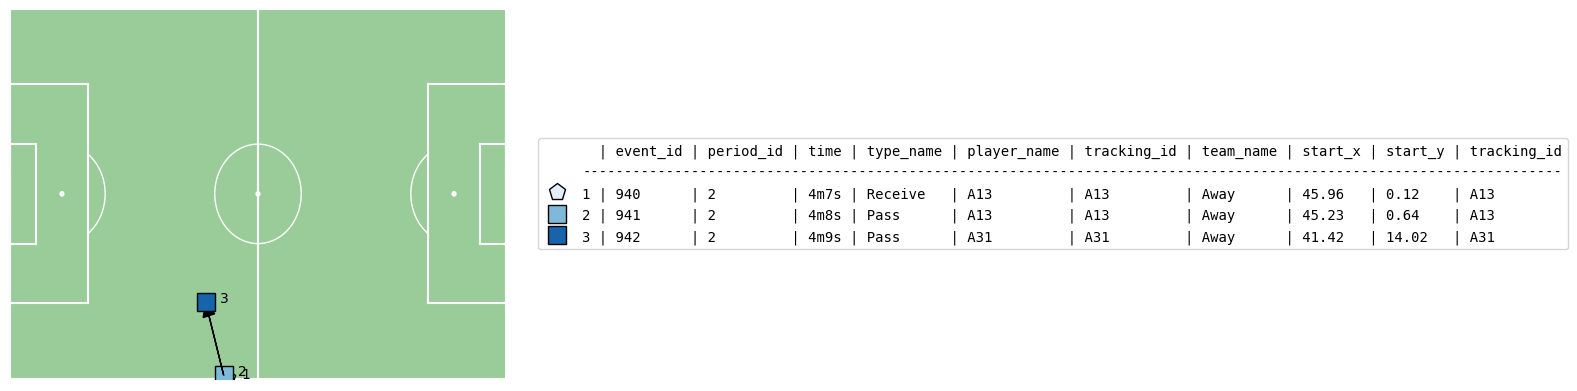

In [11]:
from datatools.utils import compute_camera_coverage, is_inside
import datatools.matplotsoccer as mps

filtered_events = events[events["start_x"].notna() & events["start_y"].notna()]
# 389: overview
# 689: application
# filtered_events = filtered_events[filtered_events["type_name"].isin(["Play_Pass"])].reset_index(drop=True)
idx = 940
e = events[idx:idx+1].copy()
l = min(1, len(e))

for j in range(0, l):
    row = list(e[j:j+1].itertuples())[0]
    i = row.Index
    a = filtered_events.loc[i-0: i+2].copy()

    for col in ["start_x", "start_y"]:
        a[col] = a[col].apply(lambda x : round(x, 2))

    a["time"] = a["time_seconds"].apply(lambda t: f"{int(t // 60)}m{int(t % 60)}s")
    a["player_name"] = a["player_id"].apply(lambda x: team_sheets.loc[team_sheets["player_id"] == x, "player"].values[0])
    a["team_name"] = a["team_id"].apply(lambda x: team_sheets.loc[team_sheets["team_id"] == x, "team"].values[0])

    a["tracking_id"] = a["player_id"].apply(lambda x: team_sheets.loc[team_sheets["player_id"] == x, "xID"].values[0])
    a["tracking_id"] = a[["tracking_id", "team_name"]].apply(lambda x: f"{x[1][0]}{x[0]:02d}", axis=1)  
    
    cols = ["event_id", "period_id", "time", "type_name", "player_name", "tracking_id", "team_name", "start_x", "start_y", "tracking_id"]
    labeltitle = ["event_id", "period_id", "time", "type_name", "player_name", "tracking_id", "team_name", "start_x", "start_y", "tracking_id"]

    mps.actions(a[["start_x", "start_y"]],
                a.type_name,
                team=a.team_name,
                label=a[cols],
                color="green",
                labeltitle = labeltitle,
                zoom=False,
                show=False,
                show_legend= True)

신버전  Bepro 데이터

In [13]:
# season = "2024"
# match_id = 153387

# # 해당 match 폴더 경로
# match_path = os.path.join(base_folder, season, str(match_id))

# preprocessor = NewPreprocessor(match_id=153387, match_path=match_path)

# preprocessor.build_events()